In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import xarray as xr
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs
import numpy as np
import xgcm
from xgcm import Grid
import momlevel as ml
import pandas as pd

Matplotlib is building the font cache; this may take a moment.


### Paths for model output

In [2]:
def load_ocean_Drake_Passage(model_config):
    
    ## p125 configurations
    
    ##### CONTROL RUN 
    if model_config == 'Odiv-209':
        ds_u = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20210706/CM4_piControl_c192_OM4p125_v7/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/10yr/*uo.nc',
                              combine='by_coords', use_cftime=True)
        ds_umo = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20210706/CM4_piControl_c192_OM4p125_v7/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/10yr/*umo.nc',
                              combine='by_coords', use_cftime=True)
        ds_drake = xr.merge([ds_u,ds_umo])
        
    ##### CONTROL RUN NEW
    if model_config == 'Odiv-313':
        ds_u = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20230608/CM4_piControl_c192_OM4p125_v8/gfdl.ncrc5-intel22-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/5yr/*uo.nc',
                              combine='by_coords', use_cftime=True)
        ds_umo = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20230608/CM4_piControl_c192_OM4p125_v8/gfdl.ncrc5-intel22-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/5yr/*umo.nc',
                              combine='by_coords', use_cftime=True)
        ds_drake = xr.merge([ds_u,ds_umo])
    
    if model_config == 'Odiv-437':
        ds_u = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20241030/CM4_piControl_c192_OM4p125_v8followup/gfdl.ncrc5-intel23-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/5yr/*uo.nc',
                              combine='by_coords', use_cftime=True)
        ds_umo = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20241030/CM4_piControl_c192_OM4p125_v8followup/gfdl.ncrc5-intel23-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/5yr/*umo.nc',
                              combine='by_coords', use_cftime=True)
        ds_drake = xr.merge([ds_u,ds_umo])
    
    
    ##### HISTORICAL RUN (branches from year 100 of Odiv-209 piControl).
    ##### ODiv-233 only goes to 1939
    if model_config == 'Odiv-233':
        ds_u = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_historical_c192_OM4p125/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/10yr/*uo.nc',
                              combine='by_coords', use_cftime=True)
        ds_umo = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_historical_c192_OM4p125/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/10yr/*umo.nc',
                              combine='by_coords', use_cftime=True)
        ds_drake = xr.merge([ds_u,ds_umo])
        
    if model_config == 'Odiv-255':
        ds_u = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20230608/CM4_historical_c192_OM4p125/gfdl.ncrc5-intel22-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/5yr/*.uo.nc',
                              combine='by_coords', use_cftime=True)
        ds_umo = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20230608/CM4_historical_c192_OM4p125/gfdl.ncrc5-intel22-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/5yr/*.umo.nc',
                              combine='by_coords', use_cftime=True)
        ds_drake = xr.merge([ds_u,ds_umo])    
        
    ##### SSP5-85
    if model_config == 'Odiv-293':
        ds_u = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20230608/CM4_ssp585_c192_OM4p125/gfdl.ncrc5-intel22-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/5yr/*.uo.nc',
                              combine='by_coords', use_cftime=True)
        ds_umo = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20230608/CM4_ssp585_c192_OM4p125/gfdl.ncrc5-intel22-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/5yr/*.umo.nc',
                              combine='by_coords', use_cftime=True)
        ds_drake = xr.merge([ds_u,ds_umo])
        
        
   ## p25 configuration, Odiv-230+Odiv-306 is the combined piControl
    # ----------------------
    ## piControl Year 1 ---> 360 (use as years 1-->100 and then Odiv-230 below for 101 --> 360).
         
    if model_config == 'Odiv-210':
        ds_u = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20210706/CM4_piControl_c192_OM4p25_v7/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/10yr/*uo.nc',
                              combine='by_coords', use_cftime=True)
        ds_umo = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20210706/CM4_piControl_c192_OM4p25_v7/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/10yr/*umo.nc',
                              combine='by_coords', use_cftime=True)
        ds_drake = xr.merge([ds_umo])
    
    #####  ## piControl with Arctic bug fix Year 101 --> 360
    if model_config == 'Odiv-230':
        ds_u = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_piControl_c192_OM4p25_v8/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/10yr/*uo.nc',
                              combine='by_coords', use_cftime=True)
        ds_umo = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_piControl_c192_OM4p25_v8/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/10yr/*umo.nc',
                              combine='by_coords', use_cftime=True)
        ds_drake = xr.merge([ds_u,ds_umo])
    
    
    if model_config == 'Odiv-306':
        ds_u = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_piControl_c192_OM4p25_v8/gfdl.ncrc4-intel22-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/5yr/*uo.nc',
                              combine='by_coords', use_cftime=True)
        ds_umo = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_piControl_c192_OM4p25_v8/gfdl.ncrc4-intel22-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/5yr/*umo.nc',
                              combine='by_coords', use_cftime=True)
        ds_drake = xr.merge([ds_u,ds_umo])
        
    ##### HISTORICAL RUN
    if model_config == 'Odiv-231':
        ds_u = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_historical_c192_OM4p25/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/10yr/*uo.nc',
                              combine='by_coords', use_cftime=True)
        ds_umo = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_historical_c192_OM4p25/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/10yr/*umo.nc',
                              combine='by_coords', use_cftime=True)
        ds_drake = xr.merge([ds_u,ds_umo])
    
    ##### SSP5-85
    if model_config == 'Odiv-231-ssp585':
        ds_u = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_ssp585_c192_OM4p25/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/10yr/*uo.nc',
                              combine='by_coords', use_cftime=True)
        ds_umo = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_ssp585_c192_OM4p25/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/10yr/*umo.nc',
                              combine='by_coords', use_cftime=True)
        ds_drake = xr.merge([ds_u,ds_umo])
        
    return ds_drake

### Load in and slice om4p125 configurations

In [5]:
## piControl, three segments

odiv_209 = load_ocean_Drake_Passage('Odiv-209').rename({'yh_sub01':'yh',
                                              'xq_sub01':'xq',
                                              }).isel(yh=slice(6,None)).sel(time=slice('0001-01-16','0100-12-16'))

odiv_313 = load_ocean_Drake_Passage('Odiv-313').rename({'yh_sub01':'yh',
                                              'xq_sub01':'xq',
                                              }).isel(yh=slice(6,None)).sel(time=slice('0101-01-16','0450-12-16'))

odiv_437 = load_ocean_Drake_Passage('Odiv-437').rename({'yh_sub01':'yh',
                                              'xq_sub01':'xq',
                                              }).isel(yh=slice(6,None)).sel(time=slice('0451-01-16','0650-12-16'))

## historical

odiv_233 = load_ocean_Drake_Passage('Odiv-233').rename({'yh_sub01':'yh',
                                              'xq_sub01':'xq',
                                              }).isel(yh=slice(6,None))

odiv_255 = load_ocean_Drake_Passage('Odiv-255').rename({'yh_sub01':'yh',
                                              'xq_sub01':'xq',
                                              }).isel(yh=slice(6,None))

## ssp 5-8.5

odiv_293 = load_ocean_Drake_Passage('Odiv-293').rename({'yh_sub01':'yh',
                                              'xq_sub01':'xq',
                                              }).isel(yh=slice(6,None))

### Load in and slice om4p25 configurations

In [6]:
## piControl

odiv_210 = load_ocean_Drake_Passage('Odiv-210').rename({'yh_sub01':'yh',
                                              'xq_sub01':'xq',
                                              }).isel(yh=slice(6,None)).sel(time=slice('0001-01-16','0100-12-16'))

odiv_230 = load_ocean_Drake_Passage('Odiv-230').rename({'yh_sub01':'yh',
                                              'xq_sub01':'xq',
                                              }).isel(yh=slice(6,None)).sel(time=slice('0101-01-16','0360-12-16'))

odiv_306 = load_ocean_Drake_Passage('Odiv-306').rename({'yh_sub01':'yh',
                                              'xq_sub01':'xq',
                                              }).isel(yh=slice(6,None))

## historical

odiv_231 = load_ocean_Drake_Passage('Odiv-231').rename({'yh_sub01':'yh',
                                              'xq_sub01':'xq',
                                              }).isel(yh=slice(6,None))

odiv_231_SSP585 = load_ocean_Drake_Passage('Odiv-231-ssp585').rename({'yh_sub01':'yh',
                                              'xq_sub01':'xq',
                                              }).isel(yh=slice(6,None))

### Load static fields 

In [7]:
static_om4p125 = xr.open_dataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20210308/CM4_piControl_c192_OM4p125_v5_proto1/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_annual_z/ocean_annual_z.static.nc')
static_om4p25 = xr.open_dataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20210308/CM4_piControl_c192_OM4p25/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_annual_z/ocean_annual_z.static.nc')

In [8]:
def total_trans_annual(array):
    total_sv_ann = ml.util.annual_average((array.umo.sum(dim=['yh','z_l'])/10**6/1035),tcoord='time')
    return total_sv_ann

In [9]:
## p125
ACC_p125_cntrl_0_100 = total_trans_annual(odiv_209).squeeze().load()
ACC_p125_cntrl_101_450 = total_trans_annual(odiv_313).squeeze().load()
ACC_p125_cntrl_451_650 = total_trans_annual(odiv_437).squeeze().load()
ACC_p125_hist = total_trans_annual(odiv_233).squeeze().load()
ACC_p125_hist_2 = total_trans_annual(odiv_255).squeeze().load()
ACC_p125_SSP585 = total_trans_annual(odiv_293).squeeze().load()

## p25
ACC_p25_cntrl_0_100 = total_trans_annual(odiv_210).squeeze().load()
ACC_p25_cntrl_101_360 = total_trans_annual(odiv_230).squeeze().load()
ACC_p25_cntrl_361_1150 = total_trans_annual(odiv_306).squeeze().load()
ACC_p25_hist = total_trans_annual(odiv_231).squeeze().load()
ACC_p25_SSP585 = total_trans_annual(odiv_231_SSP585).squeeze().load()

### Concatenate ACC_210, ACC_230, ACC_306 along time dimension for p25 control run and concatenate ACC_209 and ACC_313 for p125 control run

In [11]:
ACC_p25_cntrl = xr.concat([ACC_p25_cntrl_0_100,ACC_p25_cntrl_101_360],dim='time')
ACC_p25_cntrl_long = xr.concat([ACC_p25_cntrl_0_100,ACC_p25_cntrl_101_360,ACC_p25_cntrl_361_1150],dim='time')
ACC_p125_cntrl = xr.concat([ACC_p125_cntrl_0_100,ACC_p125_cntrl_101_450,ACC_p125_cntrl_451_650],dim='time')

### Set time axis labels for plotting from year 1750 to 2100

In [21]:
## control fields
time_axis_1750_2650 = list(range(1750,2650)) 
time_axis_1750_2100 = list(range(1750,2100))
time_axis_1750_2400 = list(range(1750,2400))

## historical
time_axis_1850_2014 = list(range(1850,2015))
time_axis_1850_2010 = list(range(1850,2010))
time_axis_2010_2100 = list(range(2010,2100))
time_axis_2015_2100 = list(range(2015,2100))

In [22]:
## p125
ACC_p125_cntrl_time = ACC_p125_cntrl.drop(labels='time').assign_coords(coords={"time":time_axis_1750_2400})
ACC_p125_hist2_time = ACC_p125_hist_2.drop(labels='time').assign_coords(coords={"time":time_axis_1850_2014})
ACC_p125_SSP585_time = ACC_p125_SSP585.drop(labels='time').assign_coords(coords={"time":time_axis_2015_2100})


## p25
ACC_p25_cntrl_time = ACC_p25_cntrl.drop(labels='time').assign_coords(coords={"time":time_axis_1750_2110})
ACC_p25_hist_time = ACC_p25_hist.drop(labels='time').assign_coords(coords={"time":time_axis_1850_2010})
ACC_p25_SSP585_time = ACC_p25_SSP585.drop(labels='time').assign_coords(coords={"time":time_axis_2010_2100})

([<matplotlib.axis.XTick at 0x14e1d7d85dc0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

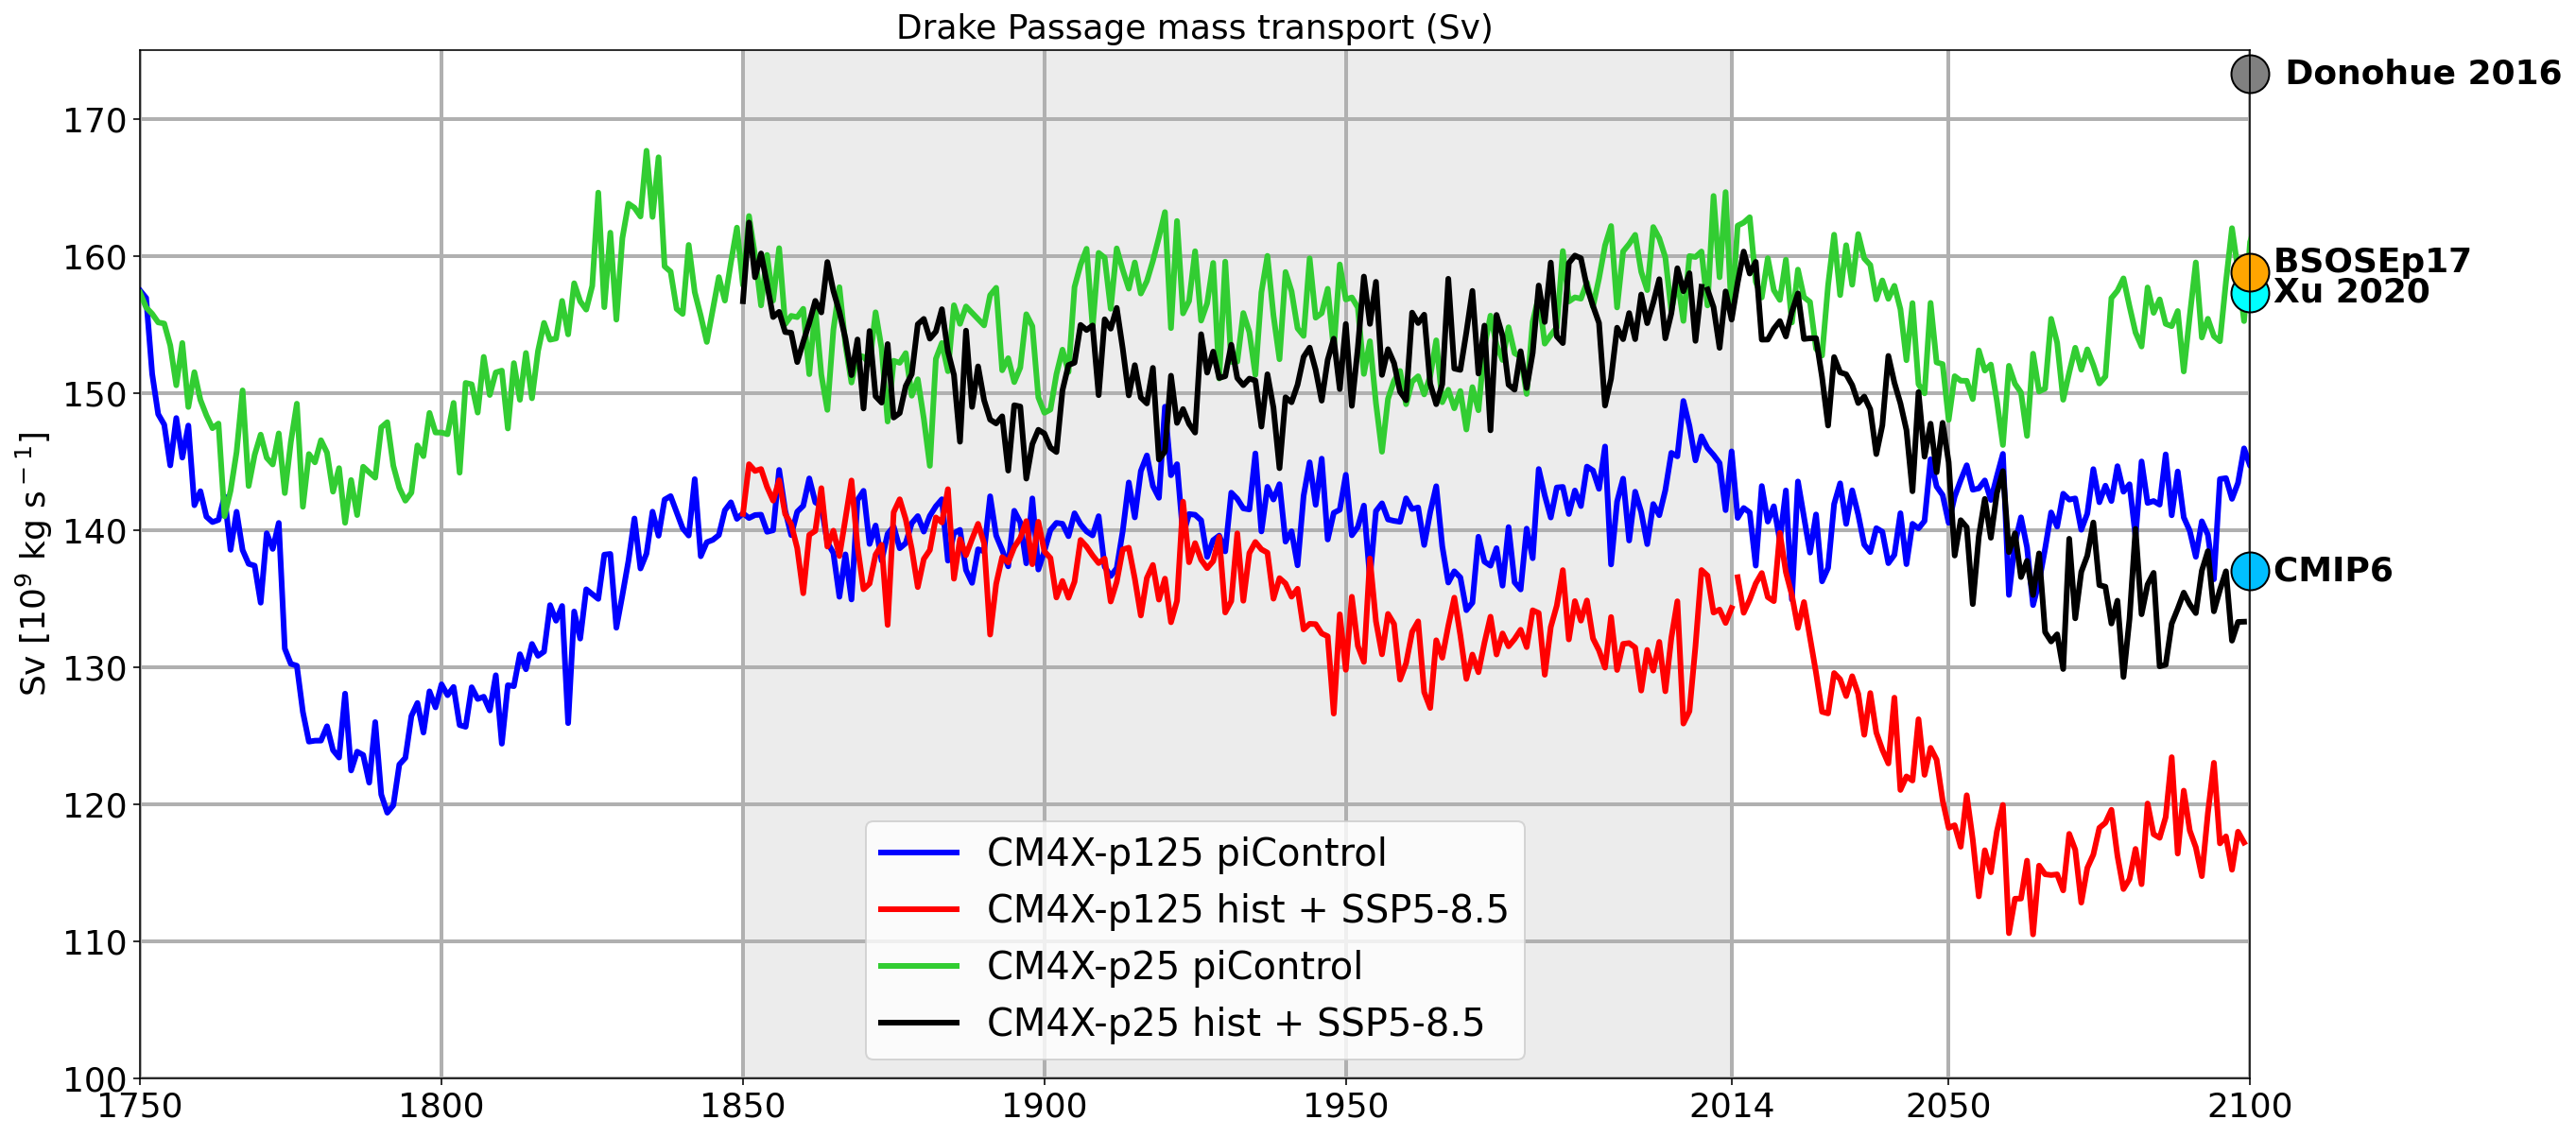

In [32]:
### Set up plots
fig, ax = plt.subplots(figsize=(20,10),facecolor='white')

plt.plot(ACC_p125_cntrl_time.time,ACC_p125_cntrl,color='blue',linewidth=3, label = 'CM4X-p125 piControl')
plt.plot(ACC_p125_hist2_time.time,ACC_p125_hist_2,color='red',linewidth=3, label = 'CM4X-p125 hist + SSP5-8.5')
plt.plot(ACC_p125_SSP585_time.time,ACC_p125_SSP585,color='red',linewidth=3,)

plt.plot(ACC_p25_cntrl_time.time,ACC_p25_cntrl.sel(time=slice('0001-07-02','0900-07-02')),color='limegreen',linewidth=3, label = 'CM4X-p25 piControl')
plt.plot(ACC_p25_hist_time.time,ACC_p25_hist,color='k',linewidth=3, label = 'CM4X-p25 hist + SSP5-8.5')
plt.plot(ACC_p25_SSP585_time.time,ACC_p25_SSP585,color='k',linewidth=3)

plt.xlim(1750,2100)
plt.grid(linewidth=1.5, linestyle='-')

ax.set_ylabel('Sv [10$^9$ kg s$^-$$^1$]',fontsize=18)
ax.set_title('Drake Passage mass transport (Sv)', fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

## add horizontal spanned shading
y1_hist = 1850
y2_hist = 2014
plt.axvspan(y1_hist, y2_hist, color='grey', alpha=0.15, lw=1)

## add horizontal spanned shading
#y1_ssp = 2014
#y2_ssp = 2100
#plt.axvspan(y1_ssp, y2_ssp, color='cornflowerblue', alpha=0.15, lw=1)

## add vertical spanned shading that indicates observations
y1_Donohue = (151.9)
y2_Donohue = (194.4)
acc_Donohue = (173.3)

y3_Xu2020 = (157.3)
y2_Xu2020 = (161.9)
acc_Xu2020 = (152.7)

acc_BSOSE_1_6 = (158.79)


plt.xticks(ticks=[1750, 1800, 1850, 1900, 1950, 2014, 2050, 2100])
plt.legend(fontsize=14)

x_end = 2100

### Add markers

ax.plot(2100,acc_Donohue,marker='o',markersize=20,markeredgecolor='k',markerfacecolor='grey',clip_on=False)
ax.annotate('   Donohue 2016',
             (2100,acc_Donohue),
             fontsize=18,fontweight='bold',
             color='k',
             horizontalalignment='left',
             va='center', clip_on=False)

ax.plot(2100,y3_Xu2020,marker='o',markersize=20,markeredgecolor='k',markerfacecolor='cyan',clip_on=False)
ax.annotate('  Xu 2020',
             (2100,y3_Xu2020),
             fontsize=18,fontweight='bold',
             color='k',
             horizontalalignment='left',
             va='center',clip_on=False)

ax.plot(2100,acc_BSOSE_1_6,marker='o',markersize=20,markeredgecolor='k',markerfacecolor='orange', clip_on=False,)
ax.annotate('  BSOSEp17',
             (2100,acc_BSOSE_1_6),
             fontsize=18,fontweight='bold',
             color='k',
             horizontalalignment='left',
             clip_on=False)

ax.plot(2100,137,marker='o',markersize=20,markeredgecolor='k',markerfacecolor='deepskyblue',clip_on=False)
ax.annotate('  CMIP6',
             (2100,137),
             fontsize=18,fontweight='bold',
             color='k',
             horizontalalignment='left',
             clip_on=False, va='center')

ax.legend(loc='lower center',fontsize=20)
ax.set_ylim([100,175])
ax.set_xlim(1750,2100)
ax.set_ylabel('Sv [10$^9$ kg s$^-$$^1$]',fontsize=18)
ax.grid(linewidth=2)
plt.xticks(ticks=[1750, 1800, 1850, 1900, 1950, 2014, 2050, 2100])

#fig.savefig('ACC_Drake_piControl_CM4X_Odiv313_update.png', bbox_inches='tight', dpi=400)

In [33]:
cmip_cm4 = xr.open_dataset('/home/rlb/acc_cmip6/notebooks/decompose_drake_passage/DrakePassage_2D_Computed_Fields_Control_new.nc')
cmip_cm4_acc = ((cmip_cm4.umo_Sv.sum(dim=['z_l','yh'])/1035)/10**6)

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

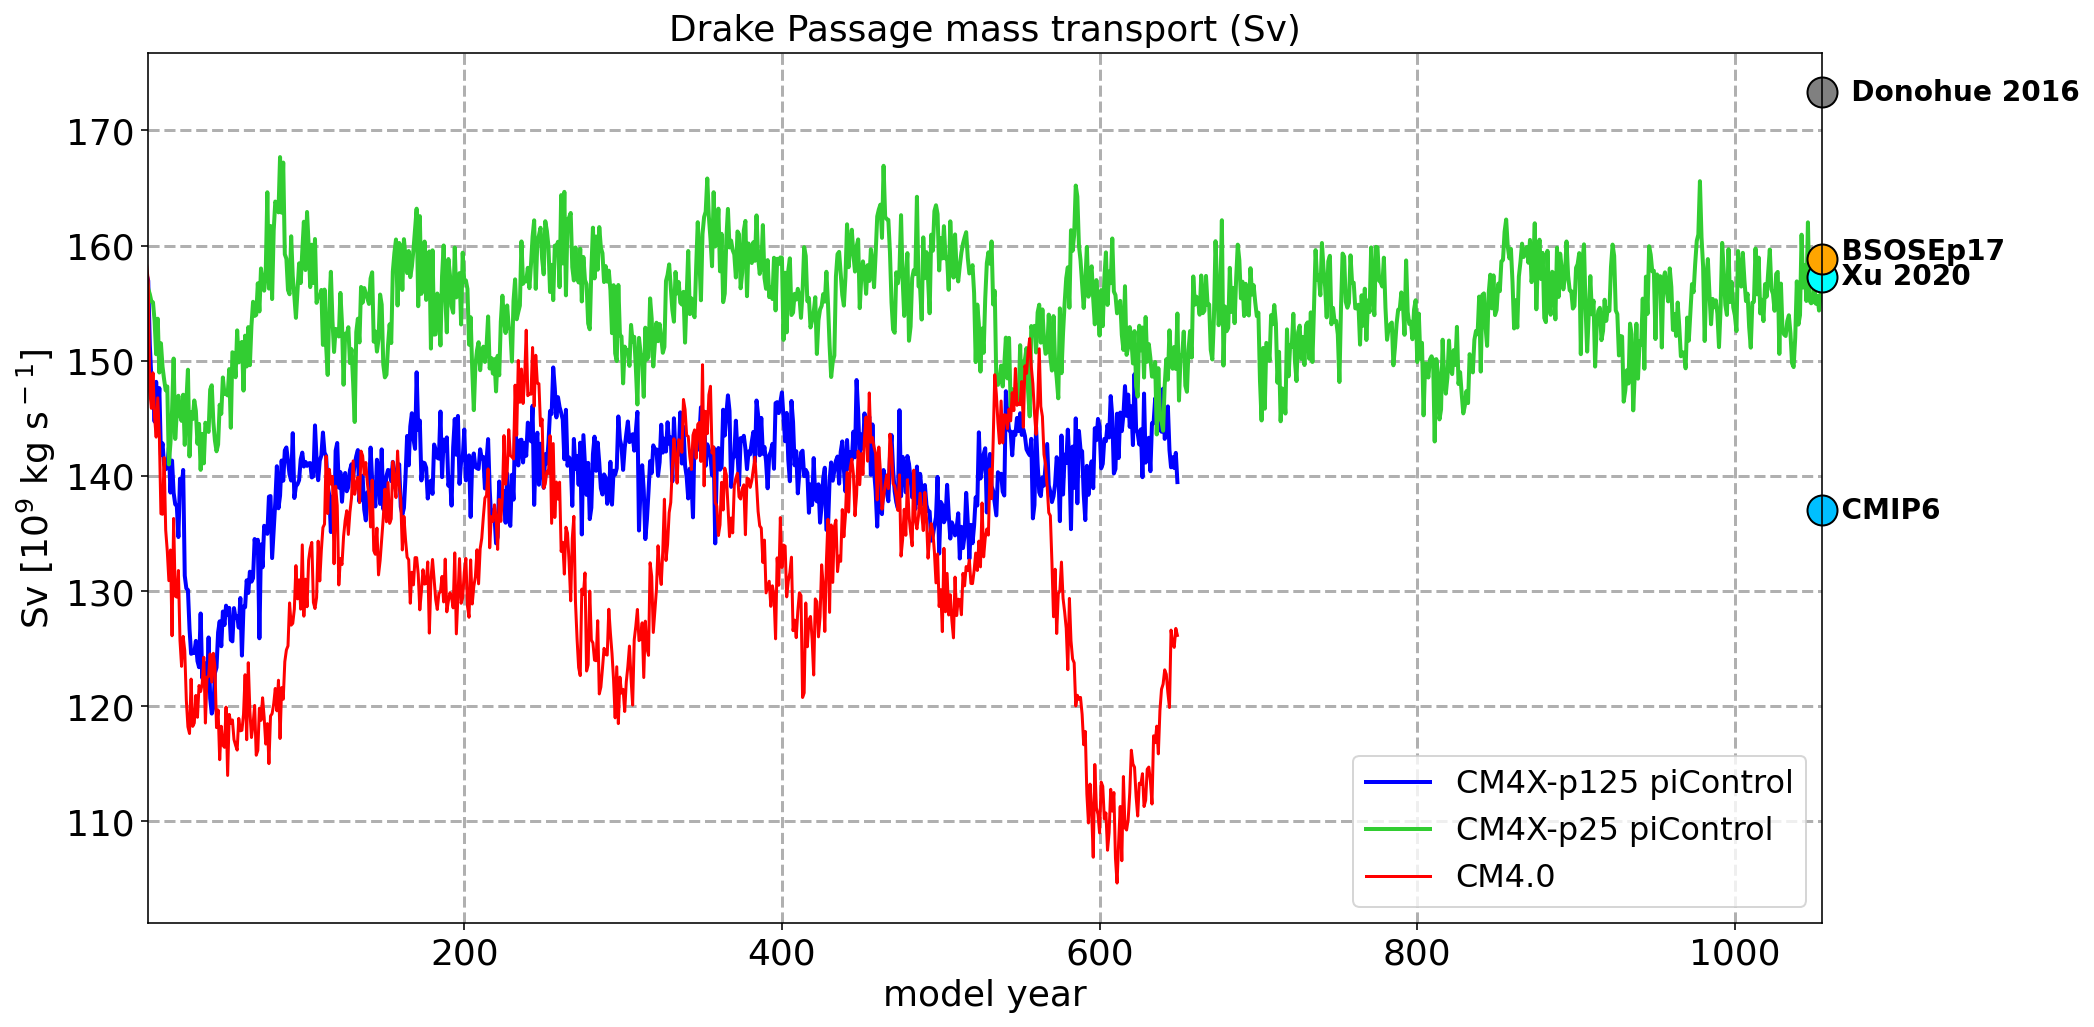

In [34]:
fig, ax = plt.subplots(figsize=(15,8),facecolor='white')

plt.plot(ACC_p125_cntrl,color='blue',linewidth=2, label = 'CM4X-p125 piControl')
plt.plot(ACC_p25_cntrl_long,color='limegreen',linewidth=2, label = 'CM4X-p25 piControl')
plt.plot(ml.util.annual_average(cmip_cm4_acc),color='red', label = 'CM4.0')

x_end = 1055


### Add markers

## 
acc_Donohue = (173.3)
acc_Xu2020 = (157.3)
acc_BSOSE_1_6 = (158.79)


ax.plot(1055,acc_Donohue,marker='o',markersize=15,markeredgecolor='k',markerfacecolor='grey',clip_on=False)
ax.annotate('   Donohue 2016',
             (1055,acc_Donohue),
             fontsize=14,fontweight='bold',
             color='k',
             horizontalalignment='left',
             va='center', clip_on=False)

ax.plot(1055,acc_Xu2020,marker='o',markersize=15,markeredgecolor='k',markerfacecolor='cyan',clip_on=False)
ax.annotate('  Xu 2020',
             (1055,acc_Xu2020),
             fontsize=14,fontweight='bold',
             color='k',
             horizontalalignment='left',
             va='center',clip_on=False)

ax.plot(1055,acc_BSOSE_1_6,marker='o',markersize=15,markeredgecolor='k',markerfacecolor='orange', clip_on=False,)
ax.annotate('  BSOSEp17',
             (1055,acc_BSOSE_1_6),
             fontsize=14,fontweight='bold',
             color='k',
             horizontalalignment='left',
             clip_on=False)

ax.plot(1055,137,marker='o',markersize=15,markeredgecolor='k',markerfacecolor='deepskyblue',clip_on=False)
ax.annotate('  CMIP6',
             (1055,137),
             fontsize=14,fontweight='bold',
             color='k',
             horizontalalignment='left',
             clip_on=False, va='center')

ax.legend(loc='lower right',fontsize=16)

plt.xlim(1,1055)
plt.grid(linewidth=1.5, linestyle='--')

ax.set_ylabel('Sv [10$^9$ kg s$^-$$^1$]',fontsize=18)
ax.set_xlabel('model year',fontsize=18)
ax.set_title('Drake Passage mass transport (Sv)', fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

#fig.savefig('ACC_Drake_piControl_CM4X_CM4p0_Updated_revision_1.png', bbox_inches='tight', dpi=400)